# **SHAI - Bootcamp - Assignment** 

In [94]:
# Import the required libraries
import pandas as pd
import numpy as nm 
import matplotlib.pyplot as plt 

# Read DataSet 
DF = pd.read_csv("Salaries.csv")

# **-- Task 1 --**

### **Basic Data Exploration**

In [95]:
# To Know the number of Columns & Rows
Shape = DF.shape  # a Tuple (rows , coulmns)
Rows = Shape[0]
Columns = Shape[1]
print(f"The Number of Coulmns in the dataset --> {Columns}")
print(f"The Number of Rows in the dataset --> {Rows}")

# The DataType for each attribute 
print("\n\n*** The data type for every attribute ***")
Data_T = DF.dtypes
print(Data_T)

The Number of Coulmns in the dataset --> 13
The Number of Rows in the dataset --> 148654


*** The data type for every attribute ***
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [96]:
# Number of Missing Data in each Column 
missing_values = DF.isnull().sum()
print("\n*** Missing values in each column ***\n")
print(missing_values)


*** Missing values in each column ***

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# **-- Task 2 --**


### **Descriptive Statistics**

In [97]:
# Basic Statistics
print( "The Total Salary Mean --> ", DF["TotalPay"].mean())

print( "The Total Salary Median --> ", DF["TotalPay"].median())

print( "The Salary Mode  --> ", DF["TotalPay"].mode()[0]) #?

print( "The Salary Standerd Deviation  --> ", DF["TotalPay"].std())

min = DF["TotalPay"].min()
max = DF["TotalPay"].max()

print( f"The Minimun Salary  --> {min}")
print( f"The Maximum Salary  --> {max}")
print( f"The Salary Range  --> {max - min}") # Range = maximum value - minimum value 



The Total Salary Mean -->  74768.32197169267
The Total Salary Median -->  71426.60999999999
The Salary Mode  -->  0.0
The Salary Standerd Deviation  -->  50517.005273949944
The Minimun Salary  --> -618.13
The Maximum Salary  --> 567595.43
The Salary Range  --> 568213.56


# **-- Task 3 --**

## **Data Cleaning**


#### There are multiple ways to handle missing data, in this assignment, I am gonna fill in the numeric Coulmn
#### that have a null value such as Benefits & BasePay with the mean and the Notes & Status with
#### "NULL" Text Because there are no values at all, and the missing data in OvertimePay & OtherPay means 
#### that the value is 0 so I fill it with that.

In [98]:
# Filling null value with mean of the attribute for Numeric 
# and "NULL" for non-Numeric 
DF2 = DF.fillna(value ={                              # ???`
                "Benefits" : DF["Benefits"].mean() , 
                "BasePay" : DF["BasePay"].mean() ,
                "OvertimePay" : 0.0 ,
                "OtherPay" : 0.0 ,
                "Notes" : "NULL" , 
                "Status" : "NULL"})

# make a new Data frame to avoid edit in original Data set 
DF2.to_csv("Modified.csv")

# Check if this process is Done by see if there are still missing data 
missing_values = DF2.isnull().sum()
print("\n*** Missing values in each column ***")
print(missing_values)
print("\n*** DONE !! ***\n")


*** Missing values in each column ***
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

*** DONE !! ***



# **-- Task 4 --**

### **Basic Data Visualization**


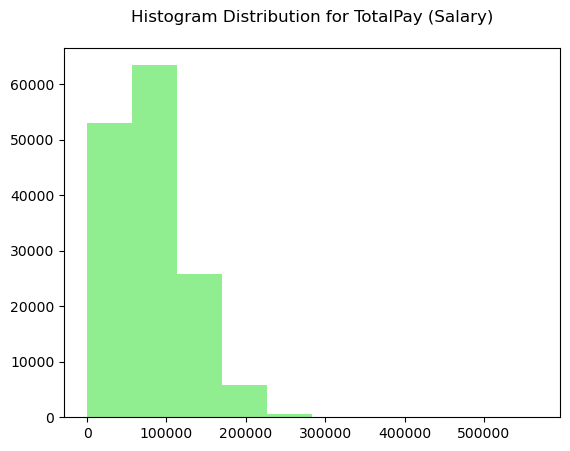

In [99]:
# Visualiza a TotalPay ( Salary ) Attrubite in a Histofram 
plt.hist(DF["TotalPay"] , color= "lightgreen")
plt.title("Histogram Distribution for TotalPay (Salary)\n")
plt.show()

### NOTE: for the pie Chart, to be honest, I think the Department is not Totlay clear in the
### Data in JobTitle attribute so based on the Note for assignment this is not clear for me  ... Thank you

# **-- Task 5 --**

### **Grouped Analysis**

In [100]:
# Group the data by Year attribute

Group_1 = DF.groupby("Year")["TotalPay"].mean()
Group_2 = DF.groupby("Year")["TotalPay"].max()

print("Average Salaries Across Different Years:")
print(Group_1, "\n\n")

print("Maximum Salaries Across Different Years:")
print(Group_2)

Average Salaries Across Different Years:
Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64 


Maximum Salaries Across Different Years:
Year
2011    567595.43
2012    362844.66
2013    347102.32
2014    471952.64
Name: TotalPay, dtype: float64


### About the Comparison I will Mention it in the summary down ...

# **-- Task 6 --**

### **Simple Correlation Analysis**



The Correlation Between Salary (TotalPay) && Year -->0.03209039798559028	--  Weake relationship  --

The Correlation Between Salary (TotalPay) && OvertimePay -->0.504858870452246	--  Medial relationship -- 





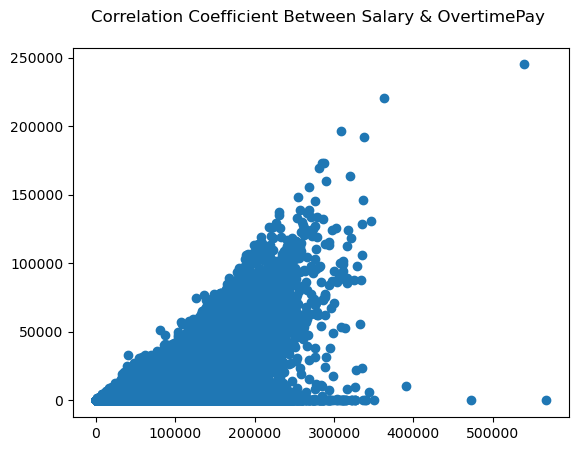

In [101]:
# Function to calculate a Correlation Coefficient Between 2 variable
# Measure if any linear relationship between this 2 variable -- range [-1, 1]

Corr = DF["TotalPay"].corr(DF["Year"])
print(f"\n\nThe Correlation Between Salary (TotalPay) && Year -->{Corr}\t--  Weake relationship  --")

Corr2 = DF["TotalPay"].corr(DF["OvertimePay"])
print(f"\nThe Correlation Between Salary (TotalPay) && OvertimePay -->{Corr2}\t--  Medial relationship -- \n\n\n")

plt.scatter(DF["TotalPay"] ,DF["OvertimePay"] )
plt.title("Correlation Coefficient Between Salary & OvertimePay \n") 


plt.show()



# **-- Task 7 --**

## **Summary of Insights**

### Report summarizing the findings and insights from the analyses

#### <> Based on the simple statistics that we calculated,  we saw that most Salary for Employees is around '74768' (the average). 
#### <> Based on the Correlation analysis, they are a Medial positive linear relationship between the OvertimePay and the Total Salary 
#### <> and they are a weak positive linear relationship between the Total Salary and the Year. 
#### <> Based on the Histogram analysis we see that the salary is positively skewed, the Order--> ( mode -- median -- mean).
#### <> In my analysis, I grouped the dataset based on the year attribute and calculated the mean and max salary for each year. 
#### <> From this analysis, I found out that the highest average salary was in 2013, and the maximum salary was in 2011.
 